In [1]:
# load up the timeseries from the model
# using only temperature
include("foamLia/foamLia.jl")
using foamLia

In [2]:
baseCase = OpenFoam("/Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase");
initCase(baseCase,"foamLia/test/juliabase/");
faces,cells = readMesh(baseCase);
points,indices = reshapeMesh(baseCase);

 in OrderedDict at deprecated.jl:26
 in create_defaultControlDict at /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/foamLia.jl:83
 in OpenFoam at /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/foamLia.jl:450
 in include_string at loading.jl:97
 in execute_request_0x535c5df2 at /Users/andyreagan/.julia/v0.3/IJulia/src/execute_request.jl:157
 in eventloop at /Users/andyreagan/.julia/v0.3/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:340
 in OrderedDict at deprecated.jl:26
 in create_defaultFvSchemes at /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/foamLia.jl:106
 in OpenFoam at /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/foamLia.jl:450
 in include_string at loading.jl:97
 in execute_request_0x535c5df2 at /Users/andyreagan/.julia/v0.3/IJulia/src/execute_request.jl:157
 in eventloop at /Users/andyreagan/.julia/v0.3/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:340
 in OrderedDict at deprecated.jl:26
 in create_defaultFvSchemes at /Users/a

/Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/system exists
/Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/constant/polyMesh exists
/Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/0 exists
copying over base case
copying foamLia/test/juliabase//Allrun to /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/Allrun
copying foamLia/test/juliabase//0/alphat to /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/0/alphat
copying foamLia/test/juliabase//0/p to /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/0/p
copying foamLia/test/juliabase//0/p_rgh to /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/0/p_rgh
copying foamLia/test/juliabase//0/T to /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/0/T
copying foamLia/test/juliabase//0/U to /Users/andyreagan/work/2014/2014-11foamLab-julia/fo

In [3]:
# let's go get the foward four points of each cell
# only get the yz coordinates
cellPoints = zeros(size(baseCase.fullMesh["cellFaces"])[2],4,3)
for cellID in 1:size(baseCase.fullMesh["cellFaces"])[2]
    faces = baseCase.fullMesh["cellFaces"][:,cellID]
    # println(faces)
    pointList = Int[]
    for faceID in 1:6
        face = faces[faceID]
        pointIDs = baseCase.fullMesh["faces"][:,face]
        # println(pointIDs)
        for pointID in 1:4
            point = pointIDs[pointID]
            if point ∉ pointList
                push!(pointList,point)
            end
        end
    end
    # println(pointList)
    # print(size(pointList))
    j = 0
    for (i,point) in enumerate(pointList)
        # println(i)
        # println(point)
        # println(baseCase.fullMesh["points"][:,point])
        pointXYZ = baseCase.fullMesh["points"][:,point]
        if pointXYZ[1] > 0
            j += 1
            cellPoints[cellID,j,:] = pointXYZ
        end
    end
end

In [4]:
T = readVar(baseCase,"8815","T")
U = readVar(baseCase,"8815","U")
Umag = sqrt(sum(U[2:3,:].^2,1))
Tminmax = (minimum(T)+10,maximum(T)-10)
Tdiff = Tminmax[2]-Tminmax[1]
Uminmax = (minimum(Umag),maximum(Umag))
Udiff = Uminmax[2]-Uminmax[1]
Tsquashed = (squeeze(T,1)-Tminmax[1])/Tdiff
Usquashed = (Umag-Uminmax[1])/Udiff

1x40000 Array{Float64,2}:
 0.204639  0.415666  0.508033  0.530428  …  0.168514  0.110889  0.0419161

In [5]:
# all of the function that are necessary for plotting
using PyPlot
using PyCall
@pyimport matplotlib as mpl
patches = mpl.pymember("patches")

RdYlBu = readcsv("/Users/andyreagan/work/2014/2014-11foamLab-julia/RdYlBu.csv");
function cmapper(cmap,val)
    squeeze(cmap[min(max(ceil(val*255),1),255),:],1)
end

lookup_table = zeros(40000,4)
lookup_table[1:19999,:] = repmat([1,2,4,3]',19999,1)
# bottom right
lookup_table[20000:30000,:] = repmat([1,2,3,4]',10001,1)
# flip every 40th
lookup_table[20000:40:29999,:] = repmat([1,2,4,3]',250,1)
lookup_table[30001:40000,:] = repmat([1,2,4,3]',10000,1)
lookup_table[40,:] = [1,2,3,4]'
lookup_table[39961:40000,:] = repmat([1,2,3,4]',40,1)
lookup_table[29961:29999,:] = repmat([1,2,4,3]',39,1)
function cell_point_order(cellID)
    # a lookup for how to reorder the point
    return squeeze(lookup_table[cellID,:],1)
end

INFO: Loading help data...


cell_point_order (generic function with 1 method)

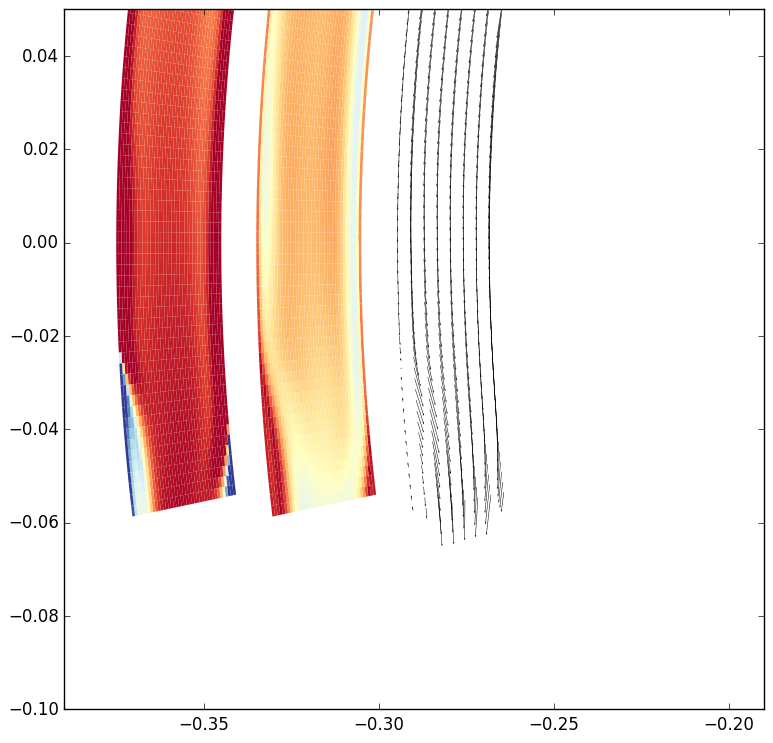

Figure(PyObject <matplotlib.figure.Figure object at 0x118e8cad0>)

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig[:add_axes]([0.2,0.2,0.7,0.7])
offset = zeros(4,2)
offset[:,1] = .04
for cellID in 1:1000
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Tsquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
    p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:]+offset,closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Usquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
end
ax[:quiver](baseCase.fullMesh["cellCenters"][2,1:5:1000]+0.08,baseCase.fullMesh["cellCenters"][3,1:5:1000],U[2,1:5:1000],U[3,1:5:1000],width=0.0007)
for cellID in 10000:11000
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Tsquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
    p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:]+offset,closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Usquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
end
ax[:quiver](baseCase.fullMesh["cellCenters"][2,10000:5:11000]+0.08,baseCase.fullMesh["cellCenters"][3,10000:5:11000],U[2,10000:5:11000],U[3,10000:5:11000],width=0.0007)
# ax[:set_xlim]([-1,1]*0.5)
# ax[:set_ylim]([-1,1]*0.5)
ax[:set_xlim]([-.39,-.19])
ax[:set_ylim]([-0.10,.05])
plt.savefig("DMD-testing-003.png")

In [7]:
println(size(squeeze(T,1)))

(40000,)


In [8]:
times = 100:10:1000
println(size(times))
D = zeros(size(squeeze(T,1))[1],size(times)[1])
for time=1:size(times)[1]
    t = times[time]
    T = readVar(baseCase,stringG(t),"T")
    D[:,time] = squeeze(T,1)
end

(91,)


In [9]:
size(D)

(40000,91)

In [10]:
D[1:10,1:10]

10x10 Array{Float64,2}:
 314.505  316.867  318.601  317.656  …  311.71   308.701  287.624  290.253
 310.868  314.114  315.002  313.268     307.66   304.873  291.63   296.136
 306.496  311.936  311.852  309.509     303.498  301.411  295.109  300.46 
 302.864  310.486  309.8    307.376     300.405  299.906  297.299  302.903
 301.746  309.636  308.646  306.391     298.544  299.586  298.377  304.122
 301.751  309.184  308.113  305.999  …  297.807  299.565  298.793  304.713
 301.904  308.801  308.045  305.875     297.74   299.58   298.905  305.004
 302.052  308.206  308.319  305.866     297.965  299.616  298.907  305.143
 302.186  307.351  308.666  305.909     298.324  299.683  298.878  305.195
 302.306  306.345  308.881  305.975     298.747  299.77   298.846  305.193

In [11]:
println(D[1,:])

[314.505 316.867 318.601 317.656 315.832 313.888 311.71 308.701 287.624 290.253 291.505 293.583 311.432 316.228 315.092 314.852 310.621 311.962 313.367 289.25 289.312 289.604 291.076 291.333 292.219 292.195 295.713 291.134 288.533 289.949 289.873 291.397 290.816 290.206 310.254 317.768 315.7 314.464 314.96 315.144 315.927 314.301 314.64 317.018 316.838 314.772 314.159 315.85 313.855 316.019 316.32 315.79 316.755 315.326 315.365 314.393 312.055 312.198 313.352 316.476 315.822 316.263 317.735 316.214 314.633 312.669 299.006 290.052 291.558 293.725 293.399 292.688 295.035 292.181 292.187 292.629 290.556 291.939 292.74 293.774 292.943 293.379 292.28 291.461 290.419 292.128 291.947 292.941 292.516 292.679 292.499]


In [12]:
F = svdfact(D)

SVD{Float64,Float64}(40000x91 Array{Float64,2}:
 -0.00500797   0.0106898     0.0520818    …  0.00633409    0.0211585  
 -0.00500752   0.00828042    0.0343183       0.013077      0.0194387  
 -0.00500359   0.00598277    0.0205722       0.0151336     0.0148957  
 -0.00500121   0.00439882    0.0119501       0.0135167     0.0101198  
 -0.00500017   0.0036814     0.00694263      0.0101268     0.00598868 
 -0.00499962   0.00340916    0.00408248   …  0.007033      0.00208204 
 -0.00499911   0.00327533    0.00240282      0.00489051   -0.00129707 
 -0.00499863   0.00318278    0.00139253      0.00358997   -0.00381062 
 -0.00499827   0.00308861    0.00080284      0.00303247   -0.00539705 
 -0.00499807   0.00298789    0.00048784      0.0030153    -0.00598669 
 -0.00499787   0.002863      0.000324547  …  0.0030677    -0.00597074 
 -0.0049976    0.00271345    0.000238639     0.00296815   -0.00561663 
 -0.00499729   0.00255502    0.000198996     0.00272069   -0.00499818 
  ⋮                          

In [13]:
U = F[:U];
S = F[:S];
Vt = F[:Vt];
println(S)

[578480.5537630214,2220.47376555599,2003.8336344110737,1742.197053163126,960.594670113937,817.2123048094043,745.4660540514823,498.655723622284,450.10489851221536,411.0332776175695,400.6788242932252,372.46619461329476,362.0790083464927,345.92574982599507,335.6802306622617,323.7470954075689,319.2267144345644,308.61464723412143,303.84362061289227,297.92999207736415,291.6630035434276,288.64136655686457,285.79510795680505,278.8247508454173,277.01369777514475,271.829005949451,266.6973997637961,260.82871944154425,255.81450959955345,255.3247796020482,248.7239210003435,246.02185043324707,241.45741078136746,240.08808606517175,238.58548386842304,234.40017818698715,229.2088993445654,226.63373026339198,222.35138885149888,221.9037268520474,216.76961301842675,213.69320742045804,211.93960345287115,208.19297475556291,204.78229097779695,203.57134505255968,203.0567448135004,198.4067108272062,196.48754348357636,192.90858461282252,191.57410362363677,188.7834737389531,186.645059115114,184.4380988081771,182.

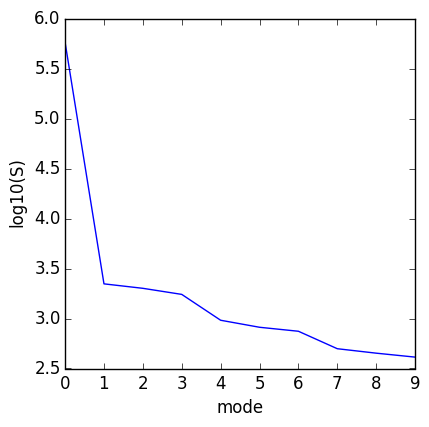

In [35]:
fig = PyPlot.matplotlib[:pyplot][:figure](figsize=(5,5))
ax = fig[:add_axes]([0.2,0.2,0.7,0.7])
ax[:plot](log10(S[1:10]))
# plt.plot(log10(S[1:10]))
ax[:set_ylabel]("log10(S)")
ax[:set_xlabel]("mode")
# plt.ylabel("log10(S)")
# plt.xlabel("mode")
# plt.savefig("/Users/andyreagan/work/2014/2014-11foamLab-julia/POD-spectrum.pdf")
PyPlot.matplotlib[:pyplot][:savefig]("/Users/andyreagan/work/2014/2014-11foamLab-julia/POD-spectrum-002.png")
# open(file -> writemime(file, "image/png", plt.gcf()), "test.png", "w")

In [15]:
U[1:10,1:10]

10x10 Array{Float64,2}:
 -0.00500797  0.0106898   0.0520818   …  -0.0150351   -0.0127913  
 -0.00500752  0.00828042  0.0343183      -0.00793424  -0.0102161  
 -0.00500359  0.00598277  0.0205722      -0.00458709  -0.00647254 
 -0.00500121  0.00439882  0.0119501      -0.00409043  -0.00341335 
 -0.00500017  0.0036814   0.00694263     -0.00451977  -0.00129689 
 -0.00499962  0.00340916  0.00408248  …  -0.00475663  -0.00020078 
 -0.00499911  0.00327533  0.00240282     -0.00467198   3.15878e-5 
 -0.00499863  0.00318278  0.00139253     -0.00439308  -0.000231274
 -0.00499827  0.00308861  0.00080284     -0.00400532  -0.00067399 
 -0.00499807  0.00298789  0.00048784     -0.00351776  -0.00132313 

In [16]:
Umax = maximum(U)

0.05208181873018024

In [17]:
Umin = minimum(U)

-0.05488501455383986

In [18]:
Urange = Umax-Umin

0.1069668332840201

In [19]:
U = (U-Umin)./Urange

40000x91 Array{Float64,2}:
 0.466285  0.613039  1.0       0.452936  …  0.411821  0.572319  0.710907
 0.466289  0.590514  0.833935  0.449947     0.46517   0.635356  0.694829
 0.466326  0.569034  0.705427  0.443313     0.52371   0.654582  0.652358
 0.466348  0.554226  0.624821  0.435378     0.557178  0.639466  0.60771 
 0.466358  0.547519  0.578008  0.429767     0.557231  0.607775  0.569089
 0.466363  0.544974  0.551269  0.426461  …  0.54312   0.578852  0.532567
 0.466368  0.543723  0.535566  0.424434     0.529306  0.558823  0.500977
 0.466372  0.542858  0.526121  0.423104     0.520382  0.546665  0.477479
 0.466376  0.541978  0.520609  0.422176     0.514657  0.541453  0.462648
 0.466378  0.541036  0.517664  0.421429     0.510374  0.541292  0.457135
 0.46638   0.539868  0.516137  0.420896  …  0.507068  0.541782  0.457284
 0.466382  0.53847   0.515334  0.420543     0.504863  0.540851  0.460595
 0.466385  0.536989  0.514963  0.420269     0.504287  0.538538  0.466377
 ⋮                      

In [20]:
function plot_loop_whole_save(T,fname)
    # plot the normalized temp T
    # around the whole loop
    fig = PyPlot.matplotlib[:pyplot][:figure](figsize=(10,10))
    ax = fig[:add_axes]([0.2,0.2,0.7,0.7])
    for cellID in 1:40000
        pts = cellPoints[cellID,:,2:3]
        # println(pts)
        p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,T[cellID]),rasterized=true)
        ax[:add_patch](p)
    end
    ax[:set_xlim]([-1,1]*0.38)
    ax[:set_ylim]([-1,1]*0.38)
    # optionally save it to PDF:
    PyPlot.matplotlib[:pyplot][:savefig](fname)
end

plot_loop_whole_save (generic function with 1 method)

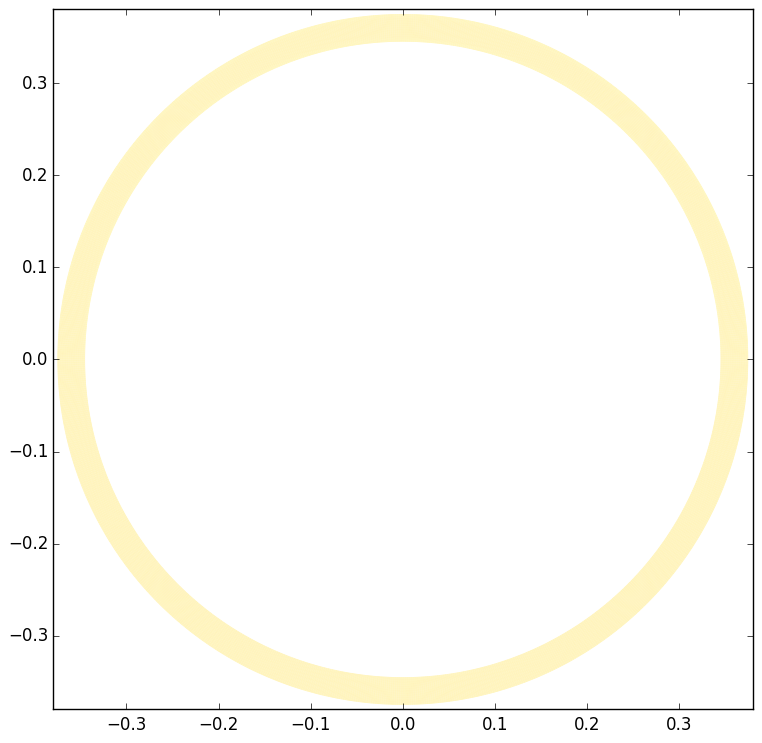

In [21]:
mode = 1
plot_loop_whole_save(U[:,mode],"/Users/andyreagan/work/2014/2014-11foamLab-julia/POD-mode$(dec(mode,2)).png")

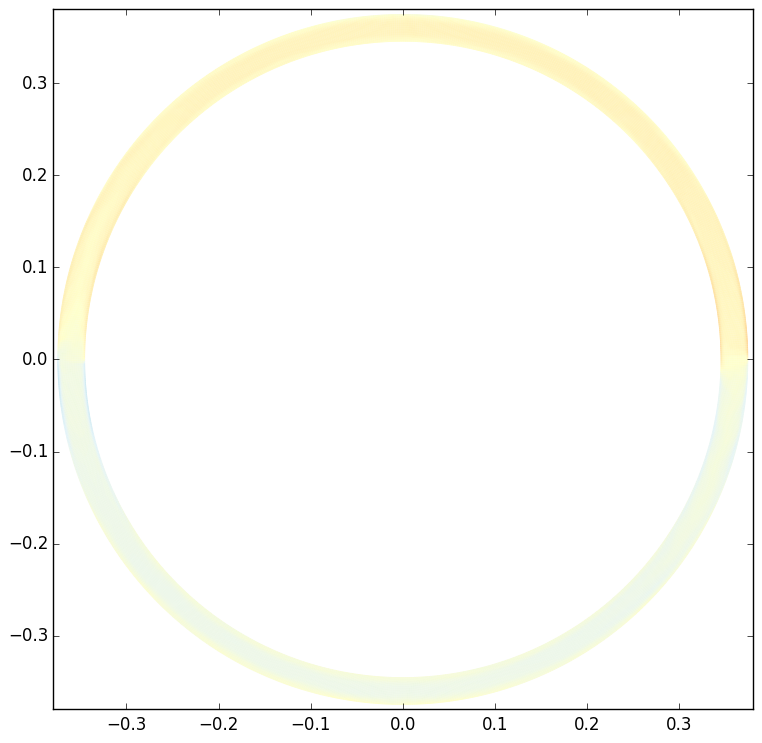

In [22]:
mode = 2
plot_loop_whole_save(U[:,mode],"/Users/andyreagan/work/2014/2014-11foamLab-julia/POD-mode$(dec(mode,2)).png")

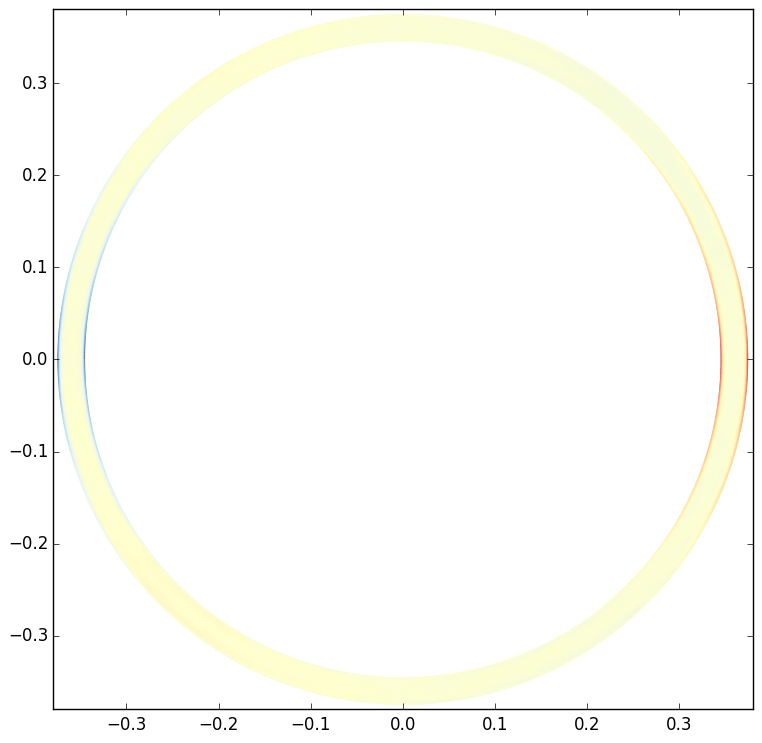

In [23]:
mode = 3
plot_loop_whole_save(U[:,mode],"/Users/andyreagan/work/2014/2014-11foamLab-julia/POD-mode$(dec(mode,2)).png")

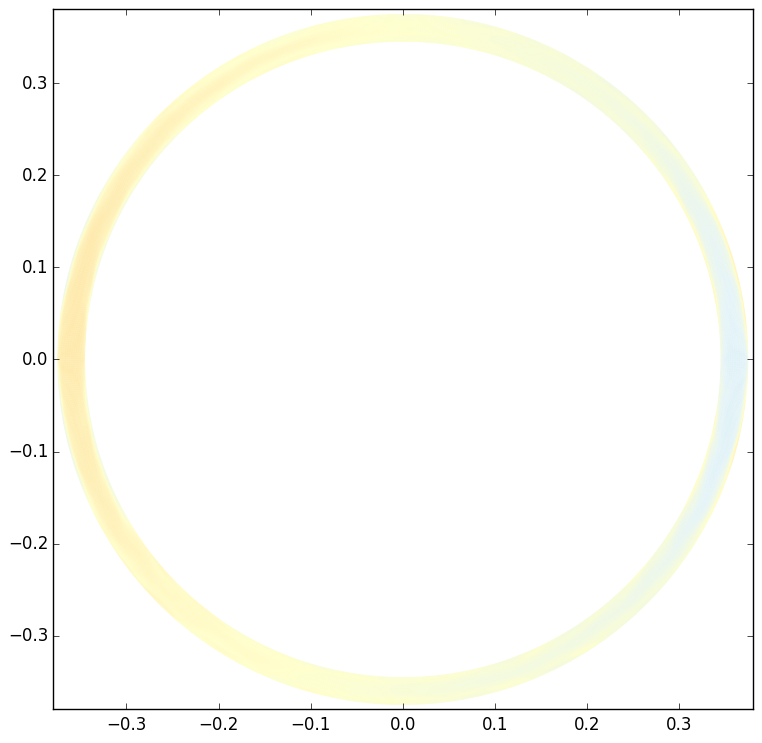

In [24]:
mode = 4
plot_loop_whole_save(U[:,mode],"/Users/andyreagan/work/2014/2014-11foamLab-julia/POD-mode$(dec(mode,2)).png")

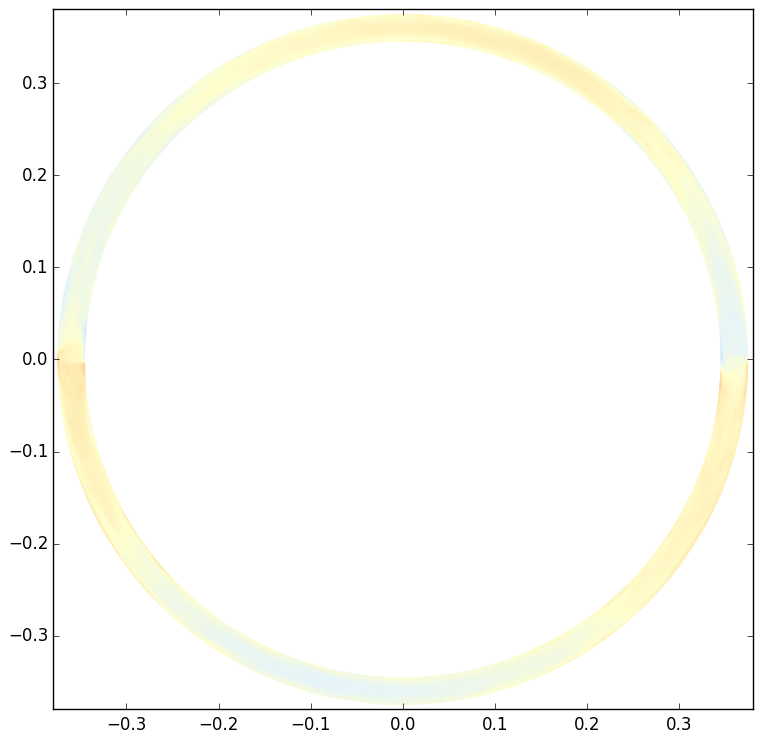

In [26]:
mode = 5
plot_loop_whole_save(U[:,mode],"/Users/andyreagan/work/2014/2014-11foamLab-julia/POD-mode$(dec(mode,2)).png")

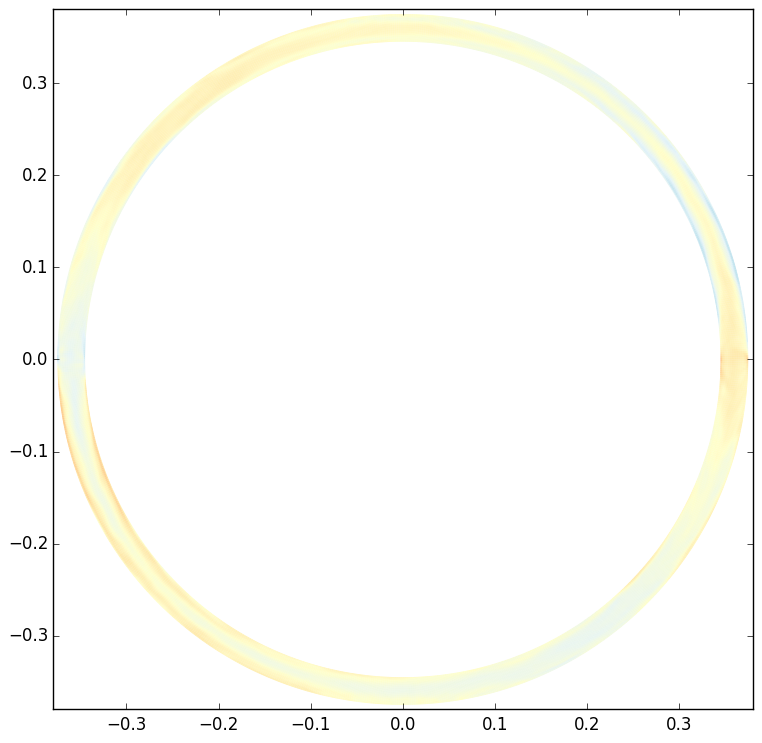

In [28]:
mode = 6`
plot_loop_whole_save(U[:,mode],"/Users/andyreagan/work/2014/2014-11foamLab-julia/POD-mode$(dec(mode,2)).png")

In [30]:
println(D[1,:])

[314.505 316.867 318.601 317.656 315.832 313.888 311.71 308.701 287.624 290.253 291.505 293.583 311.432 316.228 315.092 314.852 310.621 311.962 313.367 289.25 289.312 289.604 291.076 291.333 292.219 292.195 295.713 291.134 288.533 289.949 289.873 291.397 290.816 290.206 310.254 317.768 315.7 314.464 314.96 315.144 315.927 314.301 314.64 317.018 316.838 314.772 314.159 315.85 313.855 316.019 316.32 315.79 316.755 315.326 315.365 314.393 312.055 312.198 313.352 316.476 315.822 316.263 317.735 316.214 314.633 312.669 299.006 290.052 291.558 293.725 293.399 292.688 295.035 292.181 292.187 292.629 290.556 291.939 292.74 293.774 292.943 293.379 292.28 291.461 290.419 292.128 291.947 292.941 292.516 292.679 292.499]


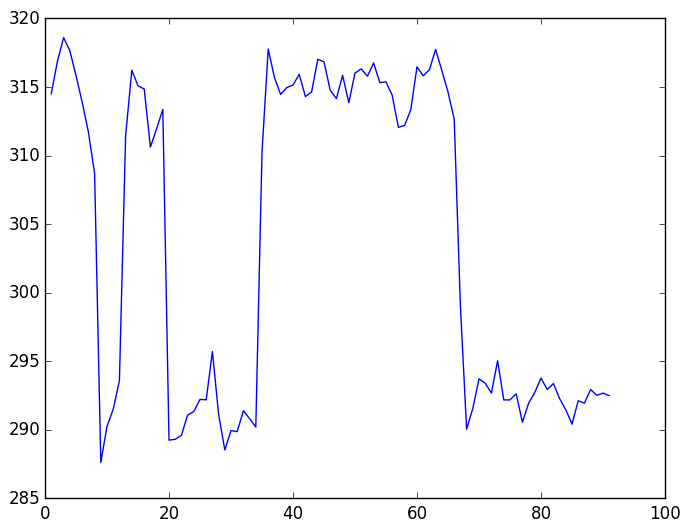

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13f4bb1d0>

In [34]:
plt.plot(1:length(D[1,:]),D[1,:]')